In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from scipy.stats import anderson

In [3]:
dataframe = pd.read_csv("train.csv")
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


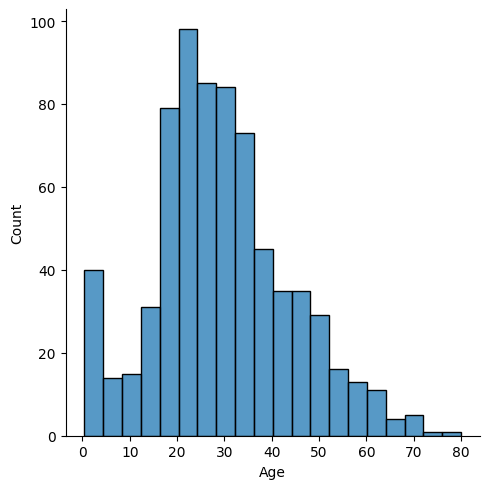

In [49]:
sb.displot(data=dataframe, x="Age", kind="hist", bins = 20, aspect = 1)

In [53]:
Y = dataframe["Age"].dropna()
X = Y.values
X

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [51]:
anderson(X)

AndersonResult(statistic=3.8230373853616584, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [52]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(X)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.981, p=0.000
Probably not Gaussian
